# Train and test the model

In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

# Training
Training  of the model on simulated data

In [9]:
img_width, img_height = 420, 420

train_data_dir = 'train'
validation_data_dir = 'validation'
nb_train_samples = 399
nb_validation_samples =398
epochs = 10
batch_size = 32

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.add(Activation('sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


train_datagen = ImageDataGenerator(
    rescale=1. / 420)


test_datagen = ImageDataGenerator(rescale=1. / 420)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


In [11]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')

# Test
Test of the model on real data

In [12]:
img_width, img_height = 420, 420
test_dir = 'test'
test_datagen = ImageDataGenerator(rescale=1./img_width)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_width, img_width),
        color_mode="rgb",
        shuffle = False,
        class_mode='binary',
        batch_size=1)


filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator,steps = nb_samples)
predict2=[]
for a in predict:
    predict2.append(float(a.round(3)))

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predict2})
results.to_csv("resultsForex.csv",index=False)
donnee=pd.read_csv('resultsForex.csv')

for i in range(0,len(donnee.Filename)):
    donnee.iloc[i,0]=donnee.iloc[i,0].split('\\')[1].split('_')[0]


Dates extraction where a head and shoulder pattern is detected

In [5]:

date_bonne=[]
j=0
while (j < len(donnee.Filename)):
    if donnee.iloc[j,1]==1:
        date_bonne.append(donnee.iloc[j,0])
        if ((len(donnee.Filename)-j)< 30):
            date_bonne.append(donnee.iloc[(j),0])
            j=len(donnee.Filename)
            break
        else:
            j=j+30
            date_bonne.append(donnee.iloc[(j),0])
    j=j+1
print(date_bonne)
a=0
lst_dict = []
while (a < len(date_bonne)):
    lst_dict.append({'x0':date_bonne[a],'x1':date_bonne[a+1],'opacity':0.2, 'type':'rect','fillcolor':'#d3d3d3', 'y0':0, 'y1':1, 'xref':'x', 'yref':'paper','line_width':1})
    a=a+2

['2017-09-28H16', '2017-09-29H2', '2017-11-08H15', '2017-11-09H20']


A plot of one head and shoulder pattern detection

2017-09-28H16


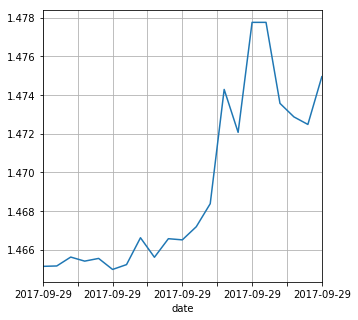

In [46]:
date_bonne=['2017-09-28H16', '2017-09-29H2']
donnee2=pd.read_csv('EUR_CAD.csv')
donnee2=donnee2.set_index('date')

a=0
while (a < 1):
    print(date_bonne[a])
    donnee_version=donnee2.loc[(donnee2.index >= date_bonne[a]) & (donnee2.index<= date_bonne[(a+1)])]
    pylab.rcParams['figure.figsize'] = (5, 5)   # Change the size of plots
    donnee_version["openbid"].plot(grid = True) # P
    plt.show()
    a=a+2



Pattern confirmation

2017-09-28H16


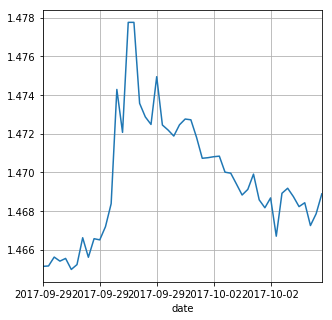

In [44]:
date_bonne=['2017-09-28H16', '2017-10-02H16']
a=0
while (a < 1):
    print(date_bonne[a])
    donnee_version=donnee2.loc[(donnee2.index >= date_bonne[a]) & (donnee2.index<= date_bonne[(a+1)])]
    pylab.rcParams['figure.figsize'] = (5,5)   # Change the size of plots
    donnee_version["openbid"].plot(grid = True) # P
    plt.show()
    a=a+2
